In [1]:
from util import *
import os, shutil
import pandas as pd

from opmap.videoData import VideoData
from opmap.vmemMap import VmemMap
from opmap.phaseMap import PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap
from elecpy.elecpySession import ElecpySession

from elecpy.cell.luorudy.const import const_d

%matplotlib inline


In [2]:
src_dir = '/mnt/recordings/SimulationResult/'
save_dir = '/mnt/recordings/AnalysisResult/Tomii/2018-08-07/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/recordings/AnalysisResult/Tomii/2018-08-07/


In [4]:
df = pd.read_csv('data.lr.ina.roi.csv')
df

,sim_id,x_min,x_max,y_min,y_max,f_min,f_max,description
0,20180820-1,90,130,80,120,1900,2900,pivot(20180806-1)
1,20180820-2,73,113,115,155,1300,2300,shift(20180809-6)
2,20180820-3,47,87,99,139,1300,2200,drift(20180816-6)
3,20180820-4,67,107,79,119,100,900,jump(20180817-6)
4,20180820-4,134,174,65,105,1000,2800,jump(20180817-6)


In [73]:
def norm(x):
    return (x-x.min())/(x.max()-x.min())

In [118]:
for i, row in df.iterrows():
    
    #if not i in [4]: continue
    
    dst_dir = os.path.join(save_dir, '{0}'.format(row['sim_id']))
    dst_dir = os.path.join(dst_dir, 'x{0}-{1}_y{2}-{3}_f{4}-{5}'.format(
        row.x_min,row.x_max,
        row.y_min,row.y_max,
        row.f_min,row.f_max,
    ))
    print(dst_dir)
    #if os.path.exists(dst_dir) : shutil.rmtree(dst_dir)
    if not os.path.exists(dst_dir) : os.makedirs(dst_dir)
        
        
    ### Plot multiple status ###
    
    sess = ElecpySession(src_dir+row.sim_id, keys=['vmem','tone','cell/ina','cell/nai','cell/m', 'cell/h', 'cell/j'])
    sess.setRange(
        x_min = row.x_min,
        x_max = row.x_max,
        y_min = row.y_min,
        y_max = row.y_max,
        f_min = row.f_min,
        f_max = row.f_max
    )
    
    #outdir = os.path.join(dst_dir, 'states')
    #if not os.path.exists(outdir): os.makedirs(outdir)

    h = sess.data['cell/h']
    j = sess.data['cell/j']
    m = sess.data['cell/m']
    vmem = sess.data['vmem']
    ena = ( const_d['R_'] * const_d['temp_'] / const_d['frdy_'] ) * np.log(const_d['nao_'] / sess.data['cell/nai'])

    p = h*j
    q = m**3
    r = vmem-ena
    #s = -p*q*r
    s = -sess.data['cell/ina']
    t = norm(-sess.data['tone'])
    
    g = np.zeros_like(p)
    g[:-1,:,:] = norm(p*q)[1:,:,:] - norm(p*q)[:-1,:,:]
    
    titles = ['hj', 'm3', 'hjm3', 'vm-ena', 'ina', 'tone', 'sum(ina)', 'sum(tone)', 'gate' ]
    
    for title in titles:
        path = os.path.join(dst_dir, title)
        if not os.path.exists(path): os.makedirs(path)

    i = 0
    for f in range(0, len(vmem), 10):
        
        path = os.path.join(dst_dir, titles[0])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), p[f,:,:], cmap='gray', vmax=p.max(), vmin=p.min())
        
        path = os.path.join(dst_dir, titles[1])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), q[f,:,:], cmap='gray', vmax=q.max(), vmin=q.min())
        
        path = os.path.join(dst_dir, titles[2])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), (p*q)[f,:,:], cmap='gray', vmax=(p*q).max(), vmin=(p*q).min())
        
        path = os.path.join(dst_dir, titles[3])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), r[f,:,:], cmap='gray', vmax=r.max(), vmin=r.min())
        
        path = os.path.join(dst_dir, titles[4])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), s[f,:,:], cmap='gray', vmax=s.max(), vmin=s.min())
        
        path = os.path.join(dst_dir, titles[5])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), t[f,:,:], cmap='gray', vmax=t.max(), vmin=t.min())
        
        path = os.path.join(dst_dir, titles[6])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), np.max(s[0:f+1,:,:], axis=0), cmap='gray', vmax=s.max(), vmin=s.min())
        
        path = os.path.join(dst_dir, titles[7])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), np.max(t[0:f+1,:,:], axis=0), cmap='gray', vmax=t.max(), vmin=t.min())

        path = os.path.join(dst_dir, titles[8])
        plt.imsave( os.path.join(path, '{0:0>6}.png'.format(f)), np.max(g[0:f+1,:,:], axis=0)>0.01, cmap='gray', vmax=g.max(), vmin=0)
        

/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180820-1/x90-130_y80-120_f1900-2900
('tone', 4001, 4001)
('cell/ina', 4001, 4001)
('cell/nai', 4001, 4001)
('cell/m', 4001, 4001)
('cell/h', 4001, 4001)
('cell/j', 4001, 4001)
/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180820-2/x73-113_y115-155_f1300-2300
('tone', 4001, 4001)
('cell/ina', 4001, 4001)
('cell/nai', 4001, 4001)
('cell/m', 4001, 4001)
('cell/h', 4001, 4001)
('cell/j', 4001, 4001)
/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180820-3/x47-87_y99-139_f1300-2200
('tone', 3501, 3501)
('cell/ina', 3501, 3501)
('cell/nai', 3501, 3501)
('cell/m', 3501, 3501)
('cell/h', 3501, 3501)
('cell/j', 3501, 3501)
/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180820-4/x67-107_y79-119_f100-900
('tone', 4001, 4001)
('cell/ina', 4001, 4001)
('cell/nai', 4001, 4001)
('cell/m', 4001, 4001)
('cell/h', 4001, 4001)
('cell/j', 4001, 4001)
/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180820-4/x134-174_y65-105_f1000-2800
('tone', 40

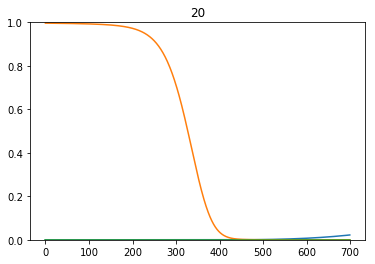

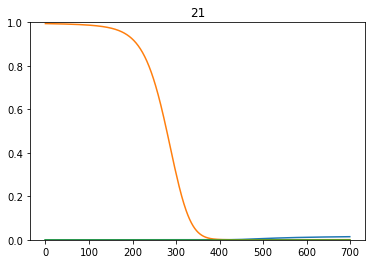

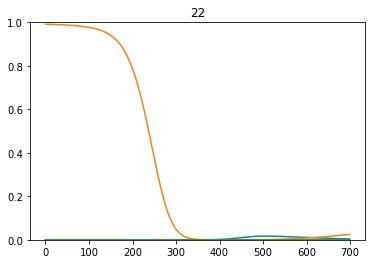

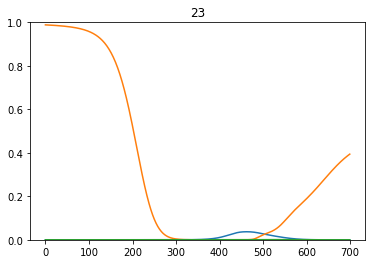

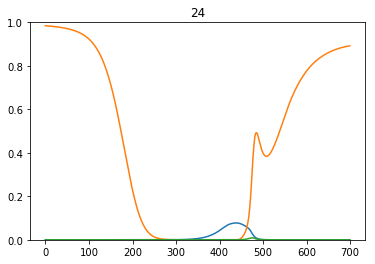

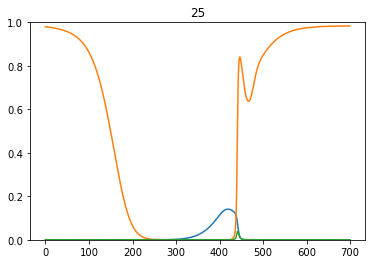

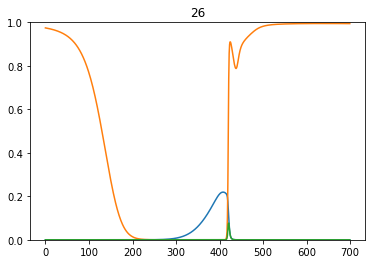

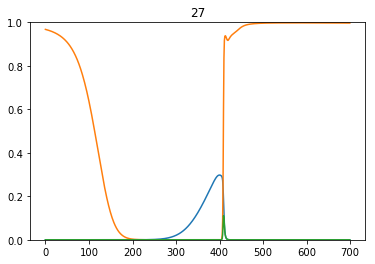

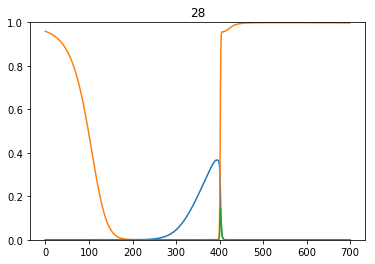

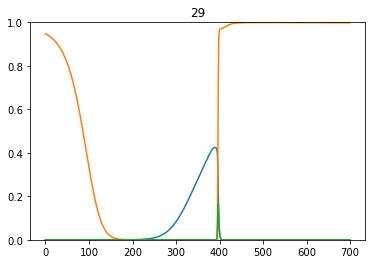

In [111]:

p_ = norm(p)
q_ = norm(q)
s_ = norm(s)
vmem_ = norm(vmem)

for dy in range(-5,5,1):
    plt.figure()
    plt.plot(p_[:700,y+dy,x])
    plt.plot(q_[:700,y+dy,x])
    #plt.plot(q_[1:701,y+dy,x]-q_[0:700,y+dy,x])
    plt.plot((p_*q_)[:700,y+dy,x])
    #plt.plot(s_[:700,y+dy,x])
    #plt.plot(vmem_[:600,y+dy,x])

    plt.title('{0}'.format(y+dy))
    plt.ylim([0, 1])
